# Testing the BATMAN python package in a Jupyter notebook

In [1]:
print("Hello world!")

Hello world!


In [2]:
!pip install batman-package

In [3]:
!python -c 'import batman;batman.test()'


Starting tests...

Testing uniform limb darkening model...	
	test passed
Testing linear limb darkening model...	
	test passed
Testing quadratic limb darkening model...	
	test passed
Testing exponential limb darkening model...	
	test passed
Testing logarithmic limb darkening model...	
	test passed
Testing nonlinear limb darkening model...	
	test passed

Testing error tolerance...
	10.0 ppm passed
	1.0 ppm passed
	0.1 ppm passed
	0.01 ppm passed

Testing multithreading...
	test passed

Congratulations! all tests passed

  ____       ____
  )   \     /   (
   )_  \_V_/  _(
     )__   __(
        `-'


##Plotting a basic transit curve from the BATMAN quickstart

In [4]:
import batman
import numpy as np
import matplotlib.pyplot as plt

In [5]:
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

In [6]:
t = np.linspace(-0.05, 0.05, 100)

In [7]:
m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)          #calculates light curve

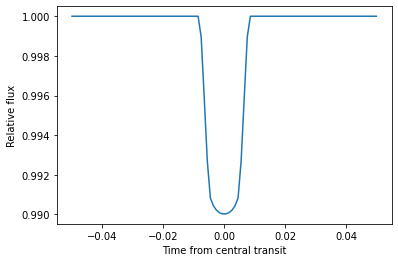

In [8]:
plt.plot(t, flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.show()

##Plotting transit curves with different paramters

###Writing a function to take parameters for plotting

In [9]:
def transit_params(int0,inper,inrp,ina,ininc,inecc,inw): #creating a function to take parameter inputs
  params.t0 = int0                       #time of inferior conjunction
  params.per = inper                     #orbital period
  params.rp = inrp                        #planet radius (in units of stellar radii)
  params.a = ina                         #semi-major axis (in units of stellar radii)
  params.inc = ininc                      #orbital inclination (in degrees)
  params.ecc = inecc                      #eccentricity
  params.w = inw                          #longitude of periastron (in degrees)
  params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
  params.limb_dark = "quadratic"       #limb darkening model
  return params

###Planet radius

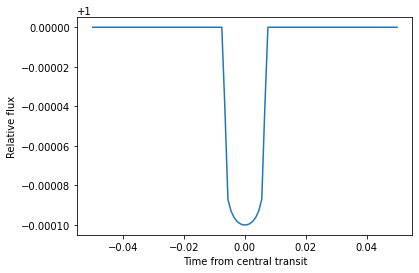

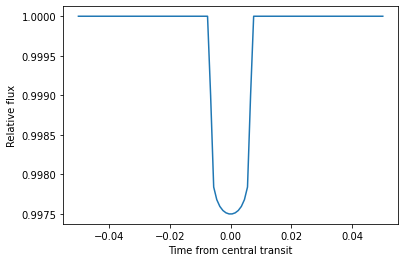

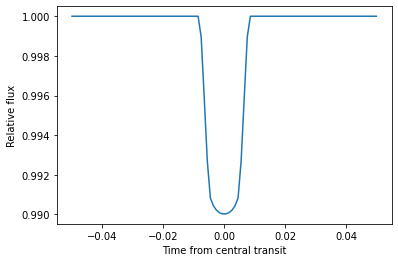

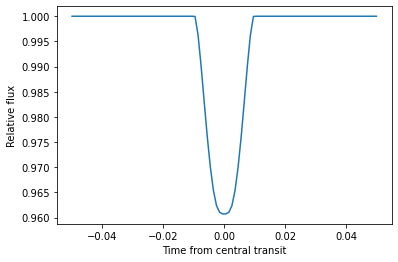

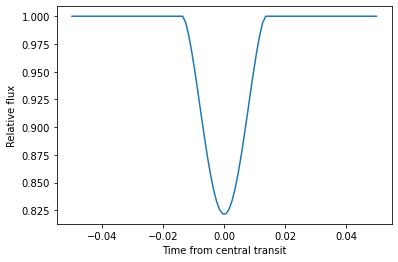

In [10]:
radius_params = [0.01,0.05,0.1,0.2,0.5]
for i in radius_params:
  params = batman.TransitParams()
  transit_params(0,1,i,15,87,0,90)
  t = np.linspace(-0.05, 0.05, 100)
  m = batman.TransitModel(params, t)    #initializes model
  flux = m.light_curve(params)          #calculates light curve
  plt.plot(t, flux)
  plt.xlabel("Time from central transit")
  plt.ylabel("Relative flux")
  plt.show()

The outputs above show the transit diagrams for the same parameters while only changing the planet radius. We can see that as the radius increases, the diagram becomes more 'V' shaped.

###Orbital inclination

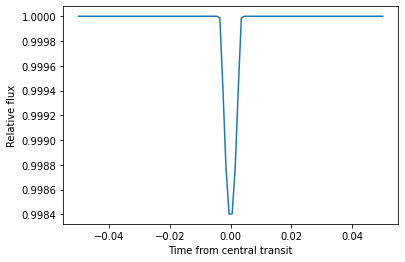

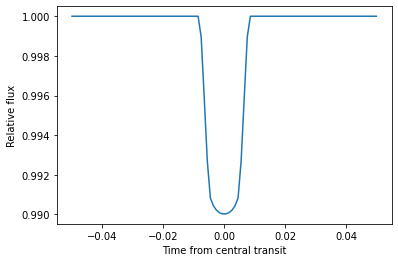

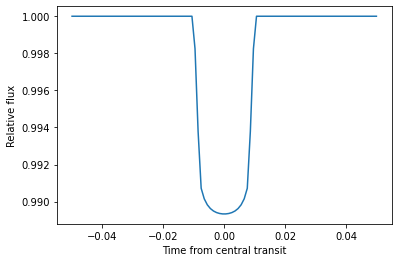

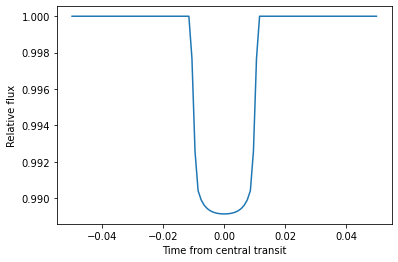

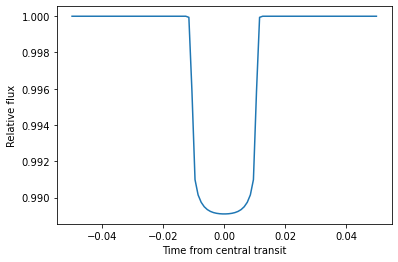

In [11]:
inclination_params = [86,87,88,89,90]
for i in inclination_params:
  params = batman.TransitParams()
  transit_params(0,1,0.1,15,i,0,90)
  t = np.linspace(-0.05, 0.05, 100)
  m = batman.TransitModel(params, t)    #initializes model
  flux = m.light_curve(params)          #calculates light curve
  plt.plot(t, flux)
  plt.xlabel("Time from central transit")
  plt.ylabel("Relative flux")
  plt.show()

The above plots show how changing the orbital inclination affects the transit curve. By increasing the orbital inclination, it increases the time of transit and a longer transit has a longer period of maximum decrease in flux.